$\hat{\beta} = 0.1694$; $T=30 \text{ or } 60$; $\phi=0.9805$; $\sigma_u / \sigma_v = 15.83$; $\sigma_u = 0.052897$; $\sigma_v = 0.003342$; $\rho_{uv} = -0.856$

$r_t$: continuously compounded return

$r_t = \alpha + \beta z_{t-1} + u_t$. Here we assume $\alpha = 0$

Assumt $z_t$ follows AR(1): 

$z_t - \mu_z = \phi (z_{t-1} - \mu_z) + v_t$

where

$\mid \phi \mid <1$ and $(u_t, v_t)$ are bivariate normal with mean zero and covariance

$\operatorname{Var}\left[\begin{array}{l}
u_{t} \\
v_{t}
\end{array}\right]=\left[\begin{array}{cc}
\sigma_{u}^{2} & \sigma_{u v} \\
\sigma_{u v} & \sigma_{v}^{2}
\end{array}\right]$



So the expectation and variance of $z_t$ is given by

assume $\mu_z = 0$

$\sigma_{z}^{2}=\sigma_{v}^{2} /\left(1-\phi^{2}\right)$

$\sigma_{r}^{2}=\sigma_{u}^{2}+\beta^2\sigma_{z}^{2} = \sigma_{u}^2+\frac{\beta^2\sigma_{v}^2}{1-\phi^2}$

We also have $r_t \sim ARMA(1,1)$

In [116]:
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


def simulated_time_series(beta, T, phi,sigma_v,u_over_v,rho,mu):
    # generate shocks
    noise_mu = [0, 0]
    sigma_u = u_over_v * sigma_v
    cov_uv = rho*sigma_u*sigma_v
    cov = [[sigma_u**2, cov_uv], [cov_uv, sigma_v**2]]
    
    shocks = np.random.multivariate_normal(noise_mu, cov, T) # 1st column is u; 2nd columne is v
    z0 = np.random.normal(mu, sigma_u ** 2/(1-phi**2), 1)
    r0 = shocks[0][0]

    z = np.zeros(T)
    r = np.zeros(T)
    z[0] = z0
    r[0] = r0

    for idx_t in range(T-1):
        z[idx_t+1] = phi*(z[idx_t]-mu) + shocks[idx_t+1][1] + mu
        r[idx_t+1] = beta*z[idx_t] + shocks[idx_t+1][0]
    return r, z

def plot_r_z(r,z,name):
    plt.figure(figsize=(15, 5))    
    xvalues = np.array(range(T))
    plt.plot(xvalues, r, linestyle='-',  color='g', label="observed $r_t$")
    plt.plot(xvalues, beta*z, linestyle='--',  color='r', label=r"hidden variable $\beta * z_t$", linewidth=3.0)

    plt.legend(loc='upper left')
    plt.xlabel('Time')
    plt.ylabel('%')
    plt.grid(True)
    #plt.title(r'Simulated $r_t$ and hidden $\beta * z_t$')
    plt.title(name)
    plt.savefig('./img_part1_b/'+name)
    plt.show()


# 探究$\phi$的作用
根据论文里的推到，$\sigma_{z}^{2}=\sigma_{v}^{2} /\left(1-\phi^{2}\right)$,我们可以知道$\phi$越大，$Z_t$的波动就会越大.在$\sigma_{v}$很小的时候，$\phi$的影响不大。

In [128]:
beta = 0.5
T = 30
phi = np.linspace(0.01,0.9,9)
sigma_v = 0.06342
u_over_v = 2
rho = -0.856
mu = 0

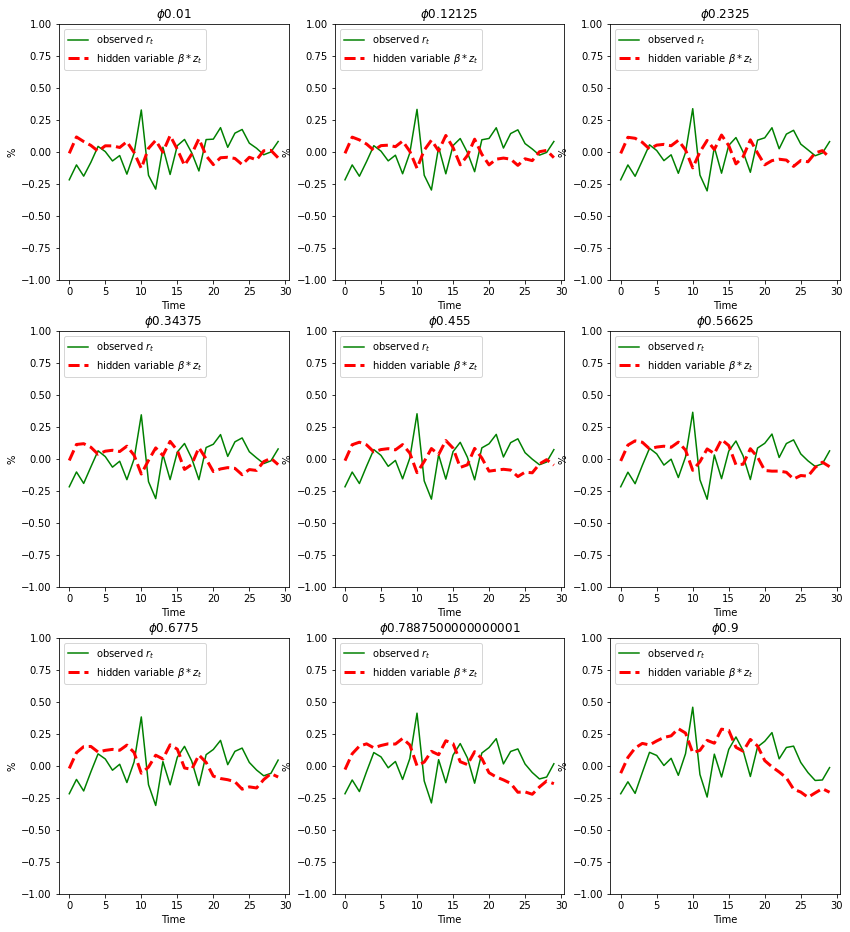

In [130]:
fig, axes = plt.subplots(3,3,figsize=(14,16))

for index, phi_ in enumerate(phi):
    a = index//3
    b = index%3
    np.random.seed(0)
    r, z = simulated_time_series(beta, T, phi_, sigma_v, u_over_v,rho,mu)
    xvalues = np.array(range(T))
    axes[a,b].set_ylim((-1,1))
    axes[a,b].plot(xvalues, r, linestyle='-',  color='g', label="observed $r_t$")
    axes[a,b].plot(xvalues, z, linestyle='--',  color='r', label=r"hidden variable $\beta * z_t$", linewidth=3.0)

    axes[a,b].legend(loc='upper left')
    axes[a,b].set_xlabel('Time')
    axes[a,b].set_ylabel('%')
    axes[a,b].set_title(r'$\phi$'+str(phi_))
    #axes[a,b].set_title(name)
    

# 探究$\frac{\sigma_u}{\sigma_v}$的作用
$\sigma_{u}$越大，signal_noise_ratio越小，observation的浮动就越大
另外当我们控制$\rho$不变时，$\sigma_{u}$越大，他们之间的covariance也越大，也间接的影响了$Z_t$的浮动大小

In [131]:
beta = 0.1694
T = 30
phi = 0.9806
sigma_v = 0.003342
u_over_v = np.linspace(1,16,9)
rho = -0.856
mu = 0

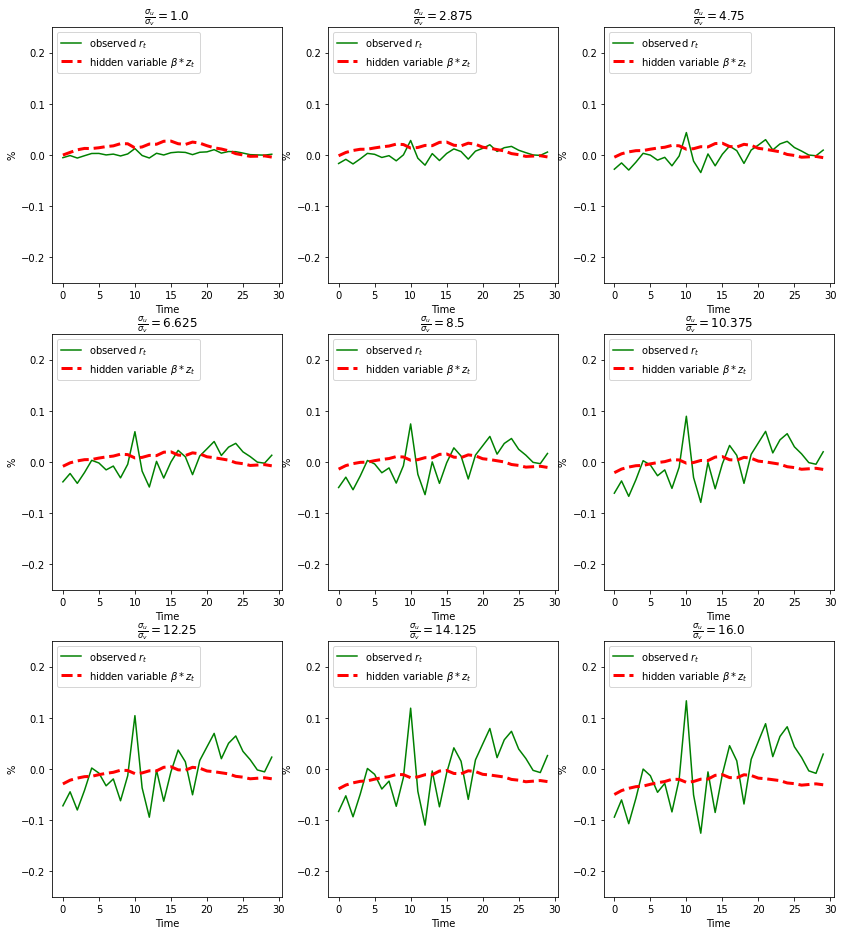

In [132]:
fig, axes = plt.subplots(3,3,figsize=(14,16))

for index, u_over_v_ in enumerate(u_over_v):
    a = index//3
    b = index%3
    np.random.seed(0)
    r, z = simulated_time_series(beta, T, phi, sigma_v, u_over_v_,rho,mu)
    xvalues = np.array(range(T))
    axes[a,b].set_ylim((-0.25,0.25))
    axes[a,b].plot(xvalues, r, linestyle='-',  color='g', label="observed $r_t$")
    axes[a,b].plot(xvalues, z, linestyle='--',  color='r', label=r"hidden variable $\beta * z_t$", linewidth=3.0)

    axes[a,b].legend(loc='upper left')
    axes[a,b].set_xlabel('Time')
    axes[a,b].set_ylabel('%')
    axes[a,b].set_title(r'$\frac{\sigma_{u}}{\sigma_{v}}=$'+str(u_over_v_))
    #axes[a,b].set_title(name)

# 探究$\beta$作用
$r_t = \beta Z_t + u_t$， $\beta$越大，$Z_t$的变化对$X_t$的影响就越大，从图片里看他们的浮动也就越大，跟$u_t$不同的是这个变化是可观察的，但是$u_t$是random noise。

In [133]:
beta = np.linspace(0,3,9)
T = 30
phi = 0.9806
sigma_v = 0.003342
u_over_v = 1
rho = -0.856
mu = 0

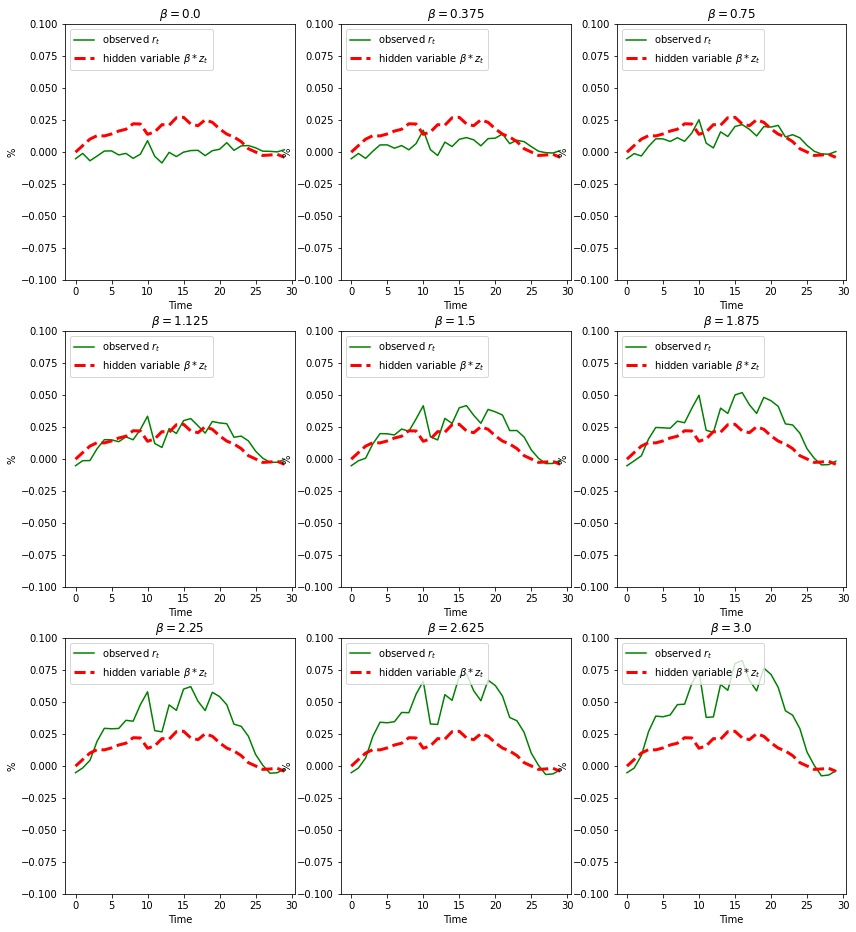

In [134]:
fig, axes = plt.subplots(3,3,figsize=(14,16))

for index, beta_ in enumerate(beta):
    a = index//3
    b = index%3
    np.random.seed(0)
    r, z = simulated_time_series(beta_, T, phi, sigma_v, u_over_v,rho,mu)
    xvalues = np.array(range(T))
    axes[a,b].set_ylim((-0.1,0.1))
    axes[a,b].plot(xvalues, r, linestyle='-',  color='g', label="observed $r_t$")
    axes[a,b].plot(xvalues, z, linestyle='--',  color='r', label=r"hidden variable $\beta * z_t$", linewidth=3.0)

    axes[a,b].legend(loc='upper left')
    axes[a,b].set_xlabel('Time')
    axes[a,b].set_ylabel('%')
    axes[a,b].set_title(r'$\beta=$'+str(beta_))
    #axes[a,b].set_title(name)

# 探究$\rho$作用
$\rho$越大，covariance越大，$Z_t$的幅度也会有点影响，但是从图里来看不大

为了方便观察noise的变化，我把$\beta$和$\phi$调的比较小

根据covariance的定义

当$\rho$=-1时，可以看到两个noise的变化有点相反

当$\rho$=1时，两个noise的变化一样

当$\rho$=0时，两个noise没有关系

In [135]:
beta = 0.01
T = 30
phi = 0.01
sigma_v = 0.03342
u_over_v = 1
rho = np.linspace(-1,1,9)
mu = 0

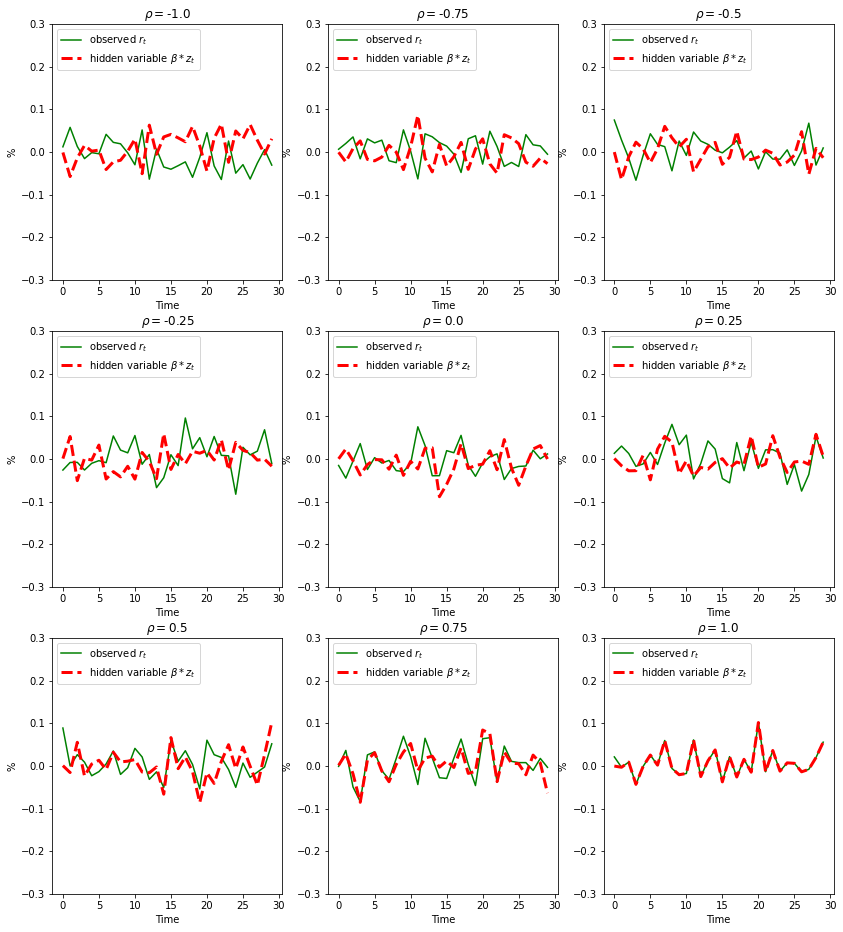

In [136]:
fig, axes = plt.subplots(3,3,figsize=(14,16))

for index, rho_ in enumerate(rho):
    a = index//3
    b = index%3
    r, z = simulated_time_series(beta, T, phi, sigma_v, u_over_v,rho_,mu)
    xvalues = np.array(range(T))
    axes[a,b].set_ylim((-0.3,0.3))
    axes[a,b].plot(xvalues, r, linestyle='-',  color='g', label="observed $r_t$")
    axes[a,b].plot(xvalues, z, linestyle='--',  color='r', label=r"hidden variable $\beta * z_t$", linewidth=3.0)

    axes[a,b].legend(loc='upper left')
    axes[a,b].set_xlabel('Time')
    axes[a,b].set_ylabel('%')
    axes[a,b].set_title(r'$\rho=$'+str(rho_))
    #axes[a,b].set_title(name)